In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

In [2]:
current_dir = os.getcwd()
dataset_dir = os.path.join(current_dir, 'datasets')

In [3]:
ghg_file_path = os.path.join(dataset_dir, 'DATASET_GHG_EMISSIONS.csv')
co2_file_path = os.path.join(dataset_dir, 'DATASET_CO2_EMISSIONS.csv')
ch4_file_path = os.path.join(dataset_dir, 'DATASET_CH4_EMISSIONS.csv')
n2o_file_path = os.path.join(dataset_dir, 'DATASET_N2O_EMISSIONS.csv')

ghg_df = pd.read_csv(ghg_file_path)
co2_df = pd.read_csv(co2_file_path)
ch4_df = pd.read_csv(ch4_file_path)
n2o_df = pd.read_csv(n2o_file_path)

co2_df = co2_df.fillna(0)
ch4_df = ch4_df.fillna(0)
n2o_df = n2o_df.fillna(0)

In [4]:
dfs = [co2_df, ch4_df, n2o_df]
for df in dfs:
    for col in df.columns:
        if df[col].dtype == 'O':
            df[col] = df[col].replace(' ', 0);
        if df[col].mean() < 1:
            df.drop(columns=col)
        else:
            print(f"Passed {col}")

Passed Year
Passed [1] Energía
Passed [1A] Actividades de quema del combustible
Passed [1A1] Industrias de la energía
Passed [1A1a] Actividad principal producción de electricidad y calor
Passed [1A1b] Refinación del petróleo
Passed [1A1c] Manufactura de combustibles sólidos y otras industrias de la energía
Passed [1A2] Industrias manufactura y de la construcción
Passed [1A2a] Hierro y acero
Passed [1A2b] Metales no ferrosos
Passed [1A2c] Sustancias químicas
Passed [1A2d] Pulpa, papel e imprenta
Passed [1A2e] Procesamiento de alimentos, bebidas y tabaco
Passed [1A2g] Equipo de transporte
Passed [1A2i] Minería (con excepción de combustibles) y cantería
Passed [1A2k] Construcción
Passed [1A2m] Industria no especificada
Passed [1A3] Transporte
Passed [1A3a] Aviación civil
Passed [1A3b] Autotransporte
Passed [1A3c] Ferrocarriles
Passed [1A3d] Navegación marítima y fluvial
Passed [1A4] Otros sectores
Passed [1A4a] Comercial/institucional
Passed [1A4b] Residencial
Passed [1A4c] Agropecuario/s

In [5]:
ghg_df

,Unnamed: 0,CO2,CH4,N2O
0,1990,319999.8455,117840.4201,28337.97300
1,1991,329716.3529,119392.8666,27177.03342
2,1992,333049.7117,117998.4615,27988.13134
3,1993,338075.1071,118275.3551,26219.01096
4,1994,360853.3477,124026.1810,28335.69607
5,1995,347496.6454,127038.4565,28258.99299
6,1996,359553.2713,131254.5972,27629.11144
7,1997,375317.2362,138365.1189,29935.23041
8,1998,393944.4869,143331.7863,30056.78095
9,1999,386967.0070,136486.7789,31511.02751


In [6]:
co2_df_zeros = co2_df.copy()
co2_df_absolutes = co2_df.copy()
ex = (co2_df < 0)
co2_df_zeros[ex] = 0
co2_df_absolutes[ex] = co2_df_absolutes[ex].abs()
co2_df.columns[ex.any() == True]

Index(['[3] Agricultura, silvicultura y otros usos de la tierra',
       '[3B] Tierra', '[3B1] Tierra forestales',
       '[3B1a] Tierras forestales que permanecen como tal',
       '[3B1b] Tierras convertidas a tierras forestales',
       '[3B2] Tierra de cultivo',
       '[3B2a] Tierras de cultivo que permanecen como tal',
       '[3B3a] Praderas que permanecen como tal', '[3D] Otros',
       '[3D1] Productos de madera recolectada'],
      dtype='object')

In [7]:
co2_df_zeros = co2_df_zeros.drop(columns='Total')
co2_df_zeros.loc[:, 'Total'] = co2_df_zeros[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
co2_df_zeros

,Year,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,...,[4A3] Tiraderos a cielo abierto para eliminación de residuos,[4B] Tratamiento biológico de los residuos sólidos,[4C] Incineración y quema a cielo abierto de residuos,[4C1] Incineración de residuos peligrosos industriales y biológico infeccioso,[4C2] Quema a cielo abierto de residuos sólidos,[4D] Tratamiento y eliminación de aguas residuales,[4D1] Tratamiento y eliminación de aguas residuales municipales,[4D2] Tratamiento y eliminación de aguas residuales industriales,[4E] Otros,Total
0,1990,287887.5409,277455.8446,107765.1217,70302.75058,11550.924750,25911.44641,50586.16156,5050.957286,2105.775916,...,0.0,0.0,402.492892,0.000000,402.492892,0.0,0.0,0.0,0.0,319999.845435
1,1991,298614.7865,287735.6752,110513.6711,72650.04122,9051.369637,28812.26020,50757.27449,4832.707613,2062.500488,...,0.0,0.0,417.196426,0.000000,417.196426,0.0,0.0,0.0,0.0,329716.352941
2,1992,299915.8933,289066.7711,109466.4754,71170.89912,9276.249502,29019.32677,50462.94825,3944.450779,2052.797629,...,0.0,0.0,432.429604,0.000000,432.429604,0.0,0.0,0.0,0.0,333049.711791
3,1993,301303.6240,289141.7224,107960.0611,73045.09756,8940.025322,25974.93819,51635.29664,3238.196589,1903.219053,...,0.0,0.0,448.279245,0.015831,448.263414,0.0,0.0,0.0,0.0,338075.107079
4,1994,321255.0435,309009.1643,123920.9638,87788.81372,10374.374950,25757.77514,52223.80871,3137.963323,1874.180830,...,0.0,0.0,464.785843,0.071336,464.714507,0.0,0.0,0.0,0.0,360853.347739
5,1995,309168.3723,295586.9869,114171.9840,81733.78736,9852.871403,22585.32521,51094.66495,2994.389626,1919.588575,...,0.0,0.0,481.869683,0.071336,481.798347,0.0,0.0,0.0,0.0,347496.645328
6,1996,322696.3935,304236.2649,117435.5156,86867.56196,9797.864023,20770.08957,53986.48713,5394.249584,2707.168828,...,0.0,0.0,500.341450,0.071336,500.270114,0.0,0.0,0.0,0.0,359916.255860
7,1997,339872.6157,317140.5100,126402.2290,96440.94705,9867.119623,20094.16235,53787.52312,5739.148112,2678.382541,...,0.0,0.0,519.552039,0.071336,519.480703,0.0,0.0,0.0,0.0,380543.586699
8,1998,360117.9344,335765.7940,140632.9102,105871.44390,10384.294660,24377.17163,53914.15733,4709.019642,2835.518736,...,0.0,0.0,539.531602,0.071336,539.460266,0.0,0.0,0.0,0.0,401618.538463
9,1999,352617.3575,332949.0626,138687.8642,106336.32410,11587.265680,20764.27441,53367.60898,4773.225478,2960.867965,...,0.0,0.0,544.666978,0.071336,544.595642,0.0,0.0,0.0,0.0,397644.952468


In [8]:
co2_df_absolutes = co2_df_absolutes.drop(columns='Total')
co2_df_absolutes.loc[:, 'Total'] = co2_df_absolutes[['[1] Energía', '[2] Procesos industriales y uso de productos', '[3] Agricultura, silvicultura y otros usos de la tierra', '[4] Residuos']].sum(axis=1)
co2_df_absolutes

,Year,[1] Energía,[1A] Actividades de quema del combustible,[1A1] Industrias de la energía,[1A1a] Actividad principal producción de electricidad y calor,[1A1b] Refinación del petróleo,[1A1c] Manufactura de combustibles sólidos y otras industrias de la energía,[1A2] Industrias manufactura y de la construcción,[1A2a] Hierro y acero,[1A2b] Metales no ferrosos,...,[4A3] Tiraderos a cielo abierto para eliminación de residuos,[4B] Tratamiento biológico de los residuos sólidos,[4C] Incineración y quema a cielo abierto de residuos,[4C1] Incineración de residuos peligrosos industriales y biológico infeccioso,[4C2] Quema a cielo abierto de residuos sólidos,[4D] Tratamiento y eliminación de aguas residuales,[4D1] Tratamiento y eliminación de aguas residuales municipales,[4D2] Tratamiento y eliminación de aguas residuales industriales,[4E] Otros,Total
0,1990,287887.5409,277455.8446,107765.1217,70302.75058,11550.924750,25911.44641,50586.16156,5050.957286,2105.775916,...,0.0,0.0,402.492892,0.000000,402.492892,0.0,0.0,0.0,0.0,319999.845435
1,1991,298614.7865,287735.6752,110513.6711,72650.04122,9051.369637,28812.26020,50757.27449,4832.707613,2062.500488,...,0.0,0.0,417.196426,0.000000,417.196426,0.0,0.0,0.0,0.0,329716.352941
2,1992,299915.8933,289066.7711,109466.4754,71170.89912,9276.249502,29019.32677,50462.94825,3944.450779,2052.797629,...,0.0,0.0,432.429604,0.000000,432.429604,0.0,0.0,0.0,0.0,333049.711791
3,1993,301303.6240,289141.7224,107960.0611,73045.09756,8940.025322,25974.93819,51635.29664,3238.196589,1903.219053,...,0.0,0.0,448.279245,0.015831,448.263414,0.0,0.0,0.0,0.0,338075.107079
4,1994,321255.0435,309009.1643,123920.9638,87788.81372,10374.374950,25757.77514,52223.80871,3137.963323,1874.180830,...,0.0,0.0,464.785843,0.071336,464.714507,0.0,0.0,0.0,0.0,360853.347739
5,1995,309168.3723,295586.9869,114171.9840,81733.78736,9852.871403,22585.32521,51094.66495,2994.389626,1919.588575,...,0.0,0.0,481.869683,0.071336,481.798347,0.0,0.0,0.0,0.0,347496.645328
6,1996,322696.3935,304236.2649,117435.5156,86867.56196,9797.864023,20770.08957,53986.48713,5394.249584,2707.168828,...,0.0,0.0,500.341450,0.071336,500.270114,0.0,0.0,0.0,0.0,360279.240381
7,1997,339872.6157,317140.5100,126402.2290,96440.94705,9867.119623,20094.16235,53787.52312,5739.148112,2678.382541,...,0.0,0.0,519.552039,0.071336,519.480703,0.0,0.0,0.0,0.0,385769.937279
8,1998,360117.9344,335765.7940,140632.9102,105871.44390,10384.294660,24377.17163,53914.15733,4709.019642,2835.518736,...,0.0,0.0,539.531602,0.071336,539.460266,0.0,0.0,0.0,0.0,409292.589987
9,1999,352617.3575,332949.0626,138687.8642,106336.32410,11587.265680,20764.27441,53367.60898,4773.225478,2960.867965,...,0.0,0.0,544.666978,0.071336,544.595642,0.0,0.0,0.0,0.0,408322.897928


In [9]:
benchmark_dict = {
    "Model": [],
    "Table": [],
    "Runtime": []
}

In [10]:
X = np.array(co2_df['Year'], dtype='int').reshape(-1, 1)
y = np.array(co2_df['Total'], dtype='float')
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
index = pd.date_range(start="1990", end="2012", freq="A")
data = pd.Series(y_train, index)

# Main loop
for i in range(50):
    benchmark_dict["Model"].append("LinearRegression")
    benchmark_dict["Table"].append("CO2_df")
    start = time.time()
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("Lasso")
    benchmark_dict["Table"].append("CO2_df")
    start = time.time()
    regressor = Lasso()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("MLPRegressor")
    benchmark_dict["Table"].append("CO2_df")
    start = time.time()
    regressor = MLPRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("PassiveAggressiveRegressor")
    benchmark_dict["Table"].append("CO2_df")
    start = time.time()
    regressor = PassiveAggressiveRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("RandomForestRegressor")
    benchmark_dict["Table"].append("CO2_df")
    start = time.time()
    regressor = RandomForestRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("DecisionForestRegressor")
    benchmark_dict["Table"].append("CO2_df")
    start = time.time()
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("SimpleExpSmoothing")
    benchmark_dict["Table"].append("CO2_df")
    start = time.time()
    fit = SimpleExpSmoothing(data, initialization_method="heuristic").fit(
        smoothing_level=0.2, optimized=False
    )
    fcast = fit.forecast(8)
    mse_score = mean_squared_error(y_test, fcast)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("ARIMA")
    benchmark_dict["Table"].append("CO2_df")
    start = time.time()
    fit = ARIMA(data, order=(1, 0, 0))
    fit.initialize_approximate_diffuse()
    fit = fit.fit()
    fcast = fit.forecast(8)
    mse_score = mean_squared_error(y_test, fcast)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

In [11]:
X = np.array(ch4_df['Year'], dtype='int').reshape(-1, 1)
y = np.array(ch4_df['Total'], dtype='float')
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
index = pd.date_range(start="1990", end="2012", freq="A")
data = pd.Series(y_train, index)

# Main loop
for i in range(50):
    benchmark_dict["Model"].append("LinearRegression")
    benchmark_dict["Table"].append("CH4_df")
    start = time.time()
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("Lasso")
    benchmark_dict["Table"].append("CH4_df")
    start = time.time()
    regressor = Lasso()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("MLPRegressor")
    benchmark_dict["Table"].append("CH4_df")
    start = time.time()
    regressor = MLPRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("PassiveAggressiveRegressor")
    benchmark_dict["Table"].append("CH4_df")
    start = time.time()
    regressor = PassiveAggressiveRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("RandomForestRegressor")
    benchmark_dict["Table"].append("CH4_df")
    start = time.time()
    regressor = RandomForestRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("DecisionForestRegressor")
    benchmark_dict["Table"].append("CH4_df")
    start = time.time()
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("SimpleExpSmoothing")
    benchmark_dict["Table"].append("CH4_df")
    start = time.time()
    fit = SimpleExpSmoothing(data, initialization_method="heuristic").fit(
        smoothing_level=0.2, optimized=False
    )
    fcast = fit.forecast(8)
    mse_score = mean_squared_error(y_test, fcast)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("ARIMA")
    benchmark_dict["Table"].append("CH4_df")
    start = time.time()
    fit = ARIMA(data, order=(1, 0, 0))
    fit.initialize_approximate_diffuse()
    fit = fit.fit()
    fcast = fit.forecast(8)
    mse_score = mean_squared_error(y_test, fcast)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

In [12]:
X = np.array(n2o_df['Year'], dtype='int').reshape(-1, 1)
y = np.array(n2o_df['Total'], dtype='float')
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
index = pd.date_range(start="1990", end="2012", freq="A")
data = pd.Series(y_train, index)

# Main loop
for i in range(50):
    benchmark_dict["Model"].append("LinearRegression")
    benchmark_dict["Table"].append("N2O_df")
    start = time.time()
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("Lasso")
    benchmark_dict["Table"].append("N2O_df")
    start = time.time()
    regressor = Lasso()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("MLPRegressor")
    benchmark_dict["Table"].append("N2O_df")
    start = time.time()
    regressor = MLPRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("PassiveAggressiveRegressor")
    benchmark_dict["Table"].append("N2O_df")
    start = time.time()
    regressor = PassiveAggressiveRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("RandomForestRegressor")
    benchmark_dict["Table"].append("N2O_df")
    start = time.time()
    regressor = RandomForestRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("DecisionForestRegressor")
    benchmark_dict["Table"].append("N2O_df")
    start = time.time()
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("SimpleExpSmoothing")
    benchmark_dict["Table"].append("N2O_df")
    start = time.time()
    fit = SimpleExpSmoothing(data, initialization_method="heuristic").fit(
        smoothing_level=0.2, optimized=False
    )
    fcast = fit.forecast(8)
    mse_score = mean_squared_error(y_test, fcast)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("ARIMA")
    benchmark_dict["Table"].append("N2O_df")
    start = time.time()
    fit = ARIMA(data, order=(1, 0, 0))
    fit.initialize_approximate_diffuse()
    fit = fit.fit()
    fcast = fit.forecast(8)
    mse_score = mean_squared_error(y_test, fcast)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-s

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-s

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-s

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [13]:
X = np.array(co2_df_zeros['Year'], dtype='int').reshape(-1, 1)
y = np.array(co2_df_zeros['Total'], dtype='float')
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
index = pd.date_range(start="1990", end="2012", freq="A")
data = pd.Series(y_train, index)

# Main loop
for i in range(50):
    benchmark_dict["Model"].append("LinearRegression")
    benchmark_dict["Table"].append("CO2_df_zeros")
    start = time.time()
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("Lasso")
    benchmark_dict["Table"].append("CO2_df_zeros")
    start = time.time()
    regressor = Lasso()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("MLPRegressor")
    benchmark_dict["Table"].append("CO2_df_zeros")
    start = time.time()
    regressor = MLPRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("PassiveAggressiveRegressor")
    benchmark_dict["Table"].append("CO2_df_zeros")
    start = time.time()
    regressor = PassiveAggressiveRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("RandomForestRegressor")
    benchmark_dict["Table"].append("CO2_df_zeros")
    start = time.time()
    regressor = RandomForestRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("DecisionForestRegressor")
    benchmark_dict["Table"].append("CO2_df_zeros")
    start = time.time()
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("SimpleExpSmoothing")
    benchmark_dict["Table"].append("CO2_df_zeros")
    start = time.time()
    fit = SimpleExpSmoothing(data, initialization_method="heuristic").fit(
        smoothing_level=0.2, optimized=False
    )
    fcast = fit.forecast(8)
    mse_score = mean_squared_error(y_test, fcast)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("ARIMA")
    benchmark_dict["Table"].append("CO2_df_zeros")
    start = time.time()
    fit = ARIMA(data, order=(1, 0, 0))
    fit.initialize_approximate_diffuse()
    fit = fit.fit()
    fcast = fit.forecast(8)
    mse_score = mean_squared_error(y_test, fcast)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

In [14]:
X = np.array(co2_df_absolutes['Year'], dtype='int').reshape(-1, 1)
y = np.array(co2_df_absolutes['Total'], dtype='float')
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
index = pd.date_range(start="1990", end="2012", freq="A")
data = pd.Series(y_train, index)

# Main loop
for i in range(50):
    benchmark_dict["Model"].append("LinearRegression")
    benchmark_dict["Table"].append("CO2_df_absolutes")
    start = time.time()
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("Lasso")
    benchmark_dict["Table"].append("CO2_df_absolutes")
    start = time.time()
    regressor = Lasso()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("MLPRegressor")
    benchmark_dict["Table"].append("CO2_df_absolutes")
    start = time.time()
    regressor = MLPRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("PassiveAggressiveRegressor")
    benchmark_dict["Table"].append("CO2_df_absolutes")
    start = time.time()
    regressor = PassiveAggressiveRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("RandomForestRegressor")
    benchmark_dict["Table"].append("CO2_df_absolutes")
    start = time.time()
    regressor = RandomForestRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("DecisionForestRegressor")
    benchmark_dict["Table"].append("CO2_df_absolutes")
    start = time.time()
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse_score = mean_squared_error(y_test, y_pred)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("SimpleExpSmoothing")
    benchmark_dict["Table"].append("CO2_df_absolutes")
    start = time.time()
    fit = SimpleExpSmoothing(data, initialization_method="heuristic").fit(
        smoothing_level=0.2, optimized=False
    )
    fcast = fit.forecast(8)
    mse_score = mean_squared_error(y_test, fcast)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)
    
    benchmark_dict["Model"].append("ARIMA")
    benchmark_dict["Table"].append("CO2_df_absolutes")
    start = time.time()
    fit = ARIMA(data, order=(1, 0, 0))
    fit.initialize_approximate_diffuse()
    fit = fit.fit()
    fcast = fit.forecast(8)
    mse_score = mean_squared_error(y_test, fcast)
    end = time.time()
    benchmark_dict["Runtime"].append(end-start)

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Daniel\Documents\ghg-emissions\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warning

In [15]:
benchmark_df = pd.DataFrame(data=benchmark_dict)
benchmark_df

,Model,Table,Runtime
0,LinearRegression,CO2_df,0.001002
1,Lasso,CO2_df,0.001001
2,MLPRegressor,CO2_df,0.032032
3,PassiveAggressiveRegressor,CO2_df,0.000999
4,RandomForestRegressor,CO2_df,0.066002
...,...,...,...
1995,PassiveAggressiveRegressor,CO2_df_absolutes,0.000000
1996,RandomForestRegressor,CO2_df_absolutes,0.065001
1997,DecisionForestRegressor,CO2_df_absolutes,0.000000
1998,SimpleExpSmoothing,CO2_df_absolutes,0.002033


In [34]:
lr_co2_mean = benchmark_df.loc[(benchmark_df['Model'] == 'LinearRegression') & (benchmark_df['Table'] == 'CO2_df')].Runtime.mean()

In [35]:
la_co2_mean = benchmark_df.loc[(benchmark_df['Model'] == 'Lasso') & (benchmark_df['Table'] == 'CO2_df')].Runtime.mean()

In [36]:
mlp_co2_mean = benchmark_df.loc[(benchmark_df['Model'] == 'MLPRegressor') & (benchmark_df['Table'] == 'CO2_df')].Runtime.mean()

In [37]:
pa_co2_mean = benchmark_df.loc[(benchmark_df['Model'] == 'PassiveAggressiveRegressor') & (benchmark_df['Table'] == 'CO2_df')].Runtime.mean()

In [38]:
rf_co2_mean = benchmark_df.loc[(benchmark_df['Model'] == 'RandomForestRegressor') & (benchmark_df['Table'] == 'CO2_df')].Runtime.mean()

In [39]:
dt_co2_mean = benchmark_df.loc[(benchmark_df['Model'] == 'DecisionForestRegressor') & (benchmark_df['Table'] == 'CO2_df')].Runtime.mean()

In [40]:
se_co2_mean = benchmark_df.loc[(benchmark_df['Model'] == 'SimpleExpSmoothing') & (benchmark_df['Table'] == 'CO2_df')].Runtime.mean()

In [41]:
ar_co2_mean = benchmark_df.loc[(benchmark_df['Model'] == 'ARIMA') & (benchmark_df['Table'] == 'CO2_df')].Runtime.mean()

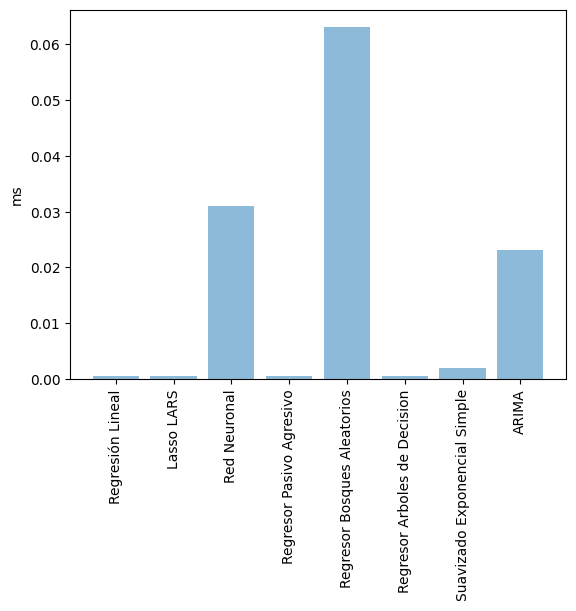

In [42]:
objects = ('Regresión Lineal', 'Lasso LARS', 'Red Neuronal', 'Regresor Pasivo Agresivo', 'Regresor Bosques Aleatorios', 'Regresor Arboles de Decision', 'Suavizado Exponencial Simple', 'ARIMA')
y_pos = np.arange(len(objects))
performance = [
    lr_co2_mean,
    la_co2_mean,
    mlp_co2_mean,
    pa_co2_mean,
    rf_co2_mean,
    dt_co2_mean,
    se_co2_mean,
    ar_co2_mean
]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('ms')

plt.show()

In [43]:
lr_co2_mean

0.0005216407775878906

In [44]:
mlp_co2_mean

0.030977616310119627

In [45]:
pa_co2_mean

0.0005428504943847657

In [46]:
rf_co2_mean

0.06303562641143799

In [47]:
dt_co2_mean

0.0005008745193481446

In [48]:
se_co2_mean

0.0020406293869018556

In [49]:
ar_co2_mean

0.02318068504333496

In [50]:
la_co2_mean

0.0005000829696655273